### The Story

This is about an Insurance company that has provided Health Insurance to its customers, now the company needs help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company again.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Therefore we are interested to predicted the response of the customer to take up the insurance (Probability of response 'yes').


In [151]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [152]:
# lets import and explore the dataset:
#insuranc = pd.read_csv('dataset.csv')
#insuranc.head()


In [153]:
# to select a small part of data set and save it into a new dataset:
#insurance1=insuranc[:38000]
#insur= insurance1.to_csv('insurance_data.csv', index=False)


In [154]:
# to read the data:
insurance = pd.read_csv('insurance_data.csv')
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [155]:
# to check on the missing values
insurance.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [156]:
# to see the data types and more information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38000 non-null  int64  
 1   Gender                38000 non-null  object 
 2   Age                   38000 non-null  int64  
 3   Driving_License       38000 non-null  int64  
 4   Region_Code           38000 non-null  float64
 5   Previously_Insured    38000 non-null  int64  
 6   Vehicle_Age           38000 non-null  object 
 7   Vehicle_Damage        38000 non-null  object 
 8   Annual_Premium        38000 non-null  float64
 9   Policy_Sales_Channel  38000 non-null  float64
 10  Vintage               38000 non-null  int64  
 11  Response              38000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.5+ MB


In [157]:
# drop 'id' and 'Region_Code'column and then add it later: 
#new_df2['id'] = insurance['id']
#new_df2['Region_Code'] = insurance['Region_Code']


#insurance.drop(['id','Region_Code' ], axis=1, inplace=True)

In [158]:
# to see the object columns
insurence_object=insurance.select_dtypes(include=['object'])
insurence_object

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
37995,Male,1-2 Year,Yes
37996,Female,1-2 Year,Yes
37997,Male,1-2 Year,Yes
37998,Female,< 1 Year,No


In [159]:
# to apply label encoder to the selected columns:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance.Gender= le.fit_transform(insurance.Gender.values)
insurance.Vehicle_Damage= le.fit_transform(insurance.Vehicle_Damage.values)


In [160]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [161]:
insurance.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000
mean,19000.500000,0.539289,38.772579,0.997895,26.451868,0.456974,0.504447,30561.325474,112.579184,154.084079,0.121711
std,10969.799451,0.498461,15.540734,0.045835,13.172705,0.498152,0.499987,17051.185695,53.928816,83.574568,0.326955
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,9500.750000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24383.000000,30.000000,82.000000,0.000000
50%,19000.500000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,31743.500000,151.000000,153.500000,0.000000
75%,28500.250000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39516.250000,152.000000,227.000000,0.000000
max,38000.000000,1.000000,84.000000,1.000000,52.000000,1.000000,1.000000,508073.000000,163.000000,299.000000,1.000000


In [162]:
# to see the corr of selected columns
insurance[['Driving_License','Previously_Insured']].corr()

,Driving_License,Previously_Insured
Driving_License,1.000000,0.013321
Previously_Insured,0.013321,1.000000


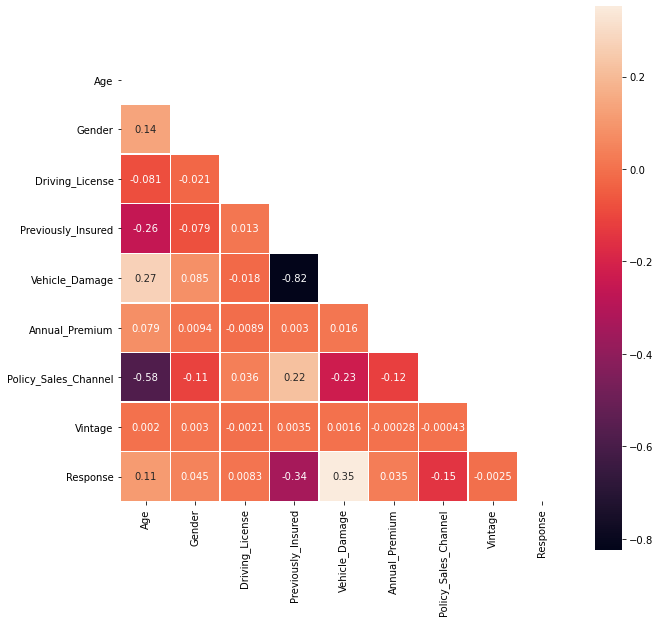

In [163]:
# correlation of selected variables:
f, b = plt.subplots(figsize=(10,10))
corr = insurance[['Age', 'Gender', 'Driving_License',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidth=0.3, square=True, annot=True)

In [164]:
# to drop the columns if their corrlation is above .95:

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] < -0.95)]
to_drop1 = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)
print(to_drop1)

[]
[]


In [165]:
# apply oneHotEncoder
from sklearn.preprocessing import OneHotEncoder                              
                              
enc = OneHotEncoder(drop = 'first')
categorical = pd.DataFrame(enc.fit_transform(insurance[['Vehicle_Age']]).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_< 1 Year,x0_> 2 Years
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [166]:
# to decode and get dummies:

dummies= pd.get_dummies(insurance['Vehicle_Age'])
insurance_1 = pd.concat([insurance, dummies], axis=1).drop(['Vehicle_Age'], axis=1)


In [167]:
insurance_1.drop(['< 1 Year'], axis=1, inplace=True)

In [168]:
insurance_1['Response'].value_counts()

0    33375
1     4625
Name: Response, dtype: int64

In [169]:
insurance_1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,> 2 Years
0,1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
1,2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0
2,3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
3,4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,0
4,5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,0


In [170]:
from sklearn.preprocessing import StandardScaler
to_transform = insurance_1[['Age', 'Annual_Premium','Policy_Sales_Channel','Vintage']]
# to select number type columns: data_num = insurance_2.select_dtypes(include=np.number)
transfor = StandardScaler().fit(to_transform)
transform_data= transfor.transform(to_transform)
transform = pd.DataFrame(transform_data, columns = to_transform.columns)
transform.head()
to_select = insurance_1[['id', 'Gender', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Response', '1-2 Year', '1-2 Year',
       '> 2 Years']]

insurance_2=pd.concat([transform, to_select], axis=1)

### Modeling, Prediction, and Evaluation

In [171]:
insurance_2.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Response,1-2 Year,1-2 Year,> 2 Years
0,0.336373,0.580183,-1.605456,0.752822,1,1,1,28.0,0,1,1,0,0,1
1,2.395505,0.174458,-1.605456,0.345994,2,1,1,3.0,0,0,0,1,1,0
2,0.529417,0.453504,-1.605456,-1.520627,3,1,1,28.0,0,1,1,0,0,1
3,-1.143628,-0.113913,0.730988,0.585304,4,1,1,11.0,1,0,0,0,0,0
4,-0.628845,-0.179774,0.730988,-1.377041,5,0,1,41.0,1,0,0,0,0,0


In [177]:
# slpit the data into 80% & 20%

from sklearn.model_selection import train_test_split 

y=insurance_1['Response']

X=insurance_1[['Age', 'Driving_License',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', '1-2 Year', '> 2 Years']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [178]:
y_test.value_counts()

0    6675
1     925
Name: Response, dtype: int64

#### we will aplly Logistic Regression 

In [189]:
from sklearn.linear_model import LogisticRegression 

logistic_model=LogisticRegression().fit(X_train, y_train)
response_pred=logistic_model.predict(X_test)
response_pred = pd.Series(response_pred)

y_pred = pd.Series(response_pred, name='response_pred').value_counts()
y_tes = y_test.value_counts()


In [190]:
pd.concat([y_tes, y_pred], axis=1)


,Response,response_pred
0,6675,7508
1,925,92


In [222]:
# Accuracy score of the Logistic Regression:
print('Accuracy score of the logistic regression is: ', ins_model.score(X_test, y_test))

Accuracy score of the logistic regression is:  0.8722368421052632


In [223]:
# another way of accuracy score:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, response_pred)


0.8722368421052632

#### in order to improve the model, we emply the decision tree model

In [216]:
from sklearn.tree import DecisionTreeClassifier

decision_reg = DecisionTreeClassifier(random_state=100).fit(X_train, y_train)
decision_predict = decision_reg.predict(X_test)

response_precidt = pd.Series(decision_predict, name='response_pred').value_counts()

In [217]:
pd.concat([y_tes, response_precidt], axis=1)


,Response,response_pred
0,6675,6610
1,925,990


In [221]:
decision_reg.score(X_test, y_test)

0.8256578947368421

In [218]:
accuracy_score(y_test, decision_predict)

0.8256578947368421

## Model Evaluation

### Creatre Confusion_matrix for Decision Tree

In [226]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, decision_predict)
print(cf_matrix)

[[5980  695]
 [ 630  295]]


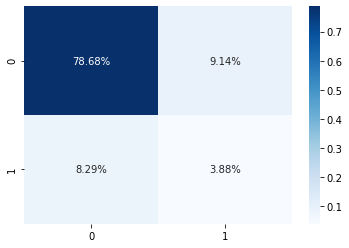

In [228]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
